Does Expensive Scotch Taste Better?
<br> by Avani Narvekar
<br> narvekar.avani2001@gmail.com


Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/scotch_review.csv')
data.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2247 non-null   int64 
 1   name          2247 non-null   object
 2   category      2247 non-null   object
 3   review.point  2247 non-null   int64 
 4   price         2247 non-null   object
 5   currency      2247 non-null   object
 6   description   2247 non-null   object
dtypes: int64(2), object(5)
memory usage: 123.0+ KB


  Creating a wordcloud

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

True

In [5]:
import re
import string

def text_cleaning(text):
    
    #Converting text into lowercase
    text = str(text).lower()
    
    #Removing square brackets from the text
    text = re.sub('\[.*?\]','',text)
    
    
    #Removing links starting with (https or www)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    #Removing <"text"> type of text 
    text = re.sub('<.*?>+','',text)
    
    #Removing punctuations
    text = re.sub("[%s]" % re.escape(string.punctuation),'',text)
    
    #Removing new lines
    text = re.sub("\n",'',text)
    
    #Removing alphanumeric numbers 
    text = re.sub('\w*\d\w*','',text)
    
    return(text)

#Applying 'text_cleaning' function on the dataset
data['description']=data['description'].apply(text_cleaning)
data.head()

#removing stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def remove_stopwords(text):
    text = text.split()
    text = [wordnet.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    text = " ".join(text)
    return(text)

data['description']=data['description'].apply(remove_stopwords)
data.head()

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,magnificently powerful intense caramel dried p...
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,impress whisky evolves incredibly complex nose...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,legendary bowmores every bit equal share remar...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,name inspired buster keaton movie bottle produ...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,captivating enticing wonderfully charming firs...


In [6]:
all_descriptions = " ".join([word for word in data['description']])

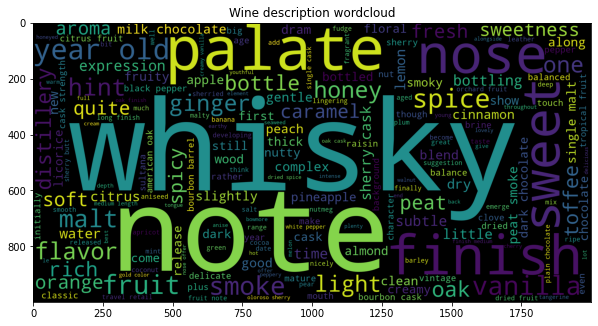

In [7]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=2000,height=1000).generate(all_descriptions)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.title("Wine description wordcloud")
plt.show()

Data Partitioning

In [8]:
df1 = pd.DataFrame(data.iloc[:,[2,3,4]])
df1.head()

,category,review.point,price
0,Blended Scotch Whisky,97,225
1,Single Malt Scotch,97,4500.00
2,Single Malt Scotch,97,13500.00
3,Blended Malt Scotch Whisky,96,325
4,Blended Malt Scotch Whisky,96,160


:Dropping any rows which has anything other than numerical string.

In [9]:
df1['price'] = pd.to_numeric(df1['price'], errors='coerce',downcast=None)
df1.shape

(2247, 3)

In [10]:
df1 = df1.dropna()
df1.shape

(2228, 3)

In [11]:
df2 = df1[['price','review.point']]

In [12]:
x= df2['price']
y= df2['review.point']

<function matplotlib.pyplot.show>

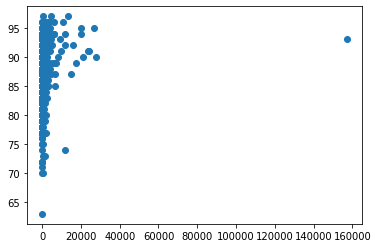

In [13]:
x= df2['price']
y= df2['review.point']
plt.scatter(x,y)
plt.show

We observe there are 2 extreme outliers, one with the max price and one with the least review points. Therefore, we drop them.

In [14]:
df2['price'].max()

157000.0

In [15]:
df2['review.point'].min()

63

In [16]:
df2 = df2.loc[df2['price'] != 157000.0]
df2 = df2.loc[df2['review.point'] != 63]

<function matplotlib.pyplot.show>

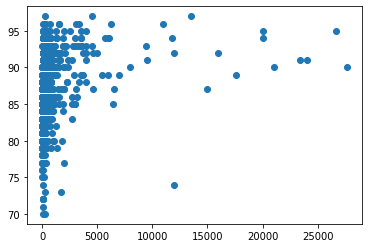

In [17]:
x= df2['price']
y= df2['review.point']
plt.scatter(x,y)
plt.show

To select the number of cluster, we use the elbow method.

In [18]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)  

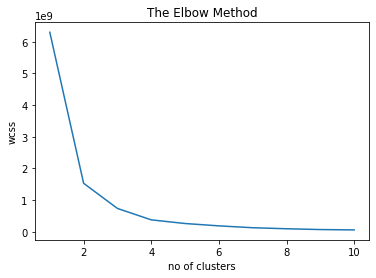

In [19]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

We use 2 clusters.

In [20]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
df2['y_kmeans']= kmeansmodel.fit_predict(df2)

In [21]:
cluster1 = df2.loc[df2['y_kmeans'] == 0]

In [22]:
cluster2 = df2.loc[df2['y_kmeans'] == 1]

In [23]:
df2.head()

,price,review.point,y_kmeans
0,225.0,97,0
1,4500.0,97,0
2,13500.0,97,1
3,325.0,96,0
4,160.0,96,0


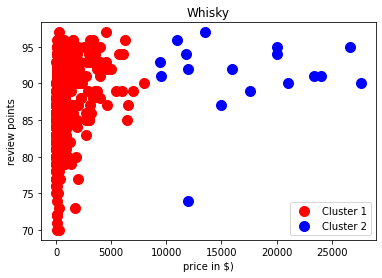

In [24]:
plt.scatter(cluster1['price'],cluster1['review.point'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(cluster2['price'],cluster2['review.point'], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Whisky')
plt.xlabel('price in $)')
plt.ylabel('review points')
plt.legend()
plt.show()

We can say, although higher priced whisky tend to have high review score, there are still many less expensive scotch which are equally or highly rated.

In [25]:
average_price=df1['price'].mean()
average_rev=df1['review.point'].mean()
print('Average price of all the scotch in data set is: \t',average_price)
print('Average review point of all the scotch in data set is: \t',average_rev)

Average price of all the scotch in data set is: 	 479.31149012567323
Average review point of all the scotch in data set is: 	 86.66202872531419


In [26]:
under100=df1[(df1['review.point'] > average_rev) & (df1['price'] < 100)]
under100[:10]

,category,review.point,price
5,Single Malt Scotch,96,85.0
16,Blended Scotch Whisky,95,70.0
18,Single Malt Scotch,95,70.0
38,Blended Malt Scotch Whisky,94,60.0
76,Blended Malt Scotch Whisky,94,84.0
80,Blended Malt Scotch Whisky,93,50.0
87,Blended Scotch Whisky,93,34.0
90,Single Malt Scotch,93,55.0
91,Single Malt Scotch,93,60.0
96,Single Malt Scotch,93,90.0
